Exemplo retirado de: [Kaggle - ML from Scratch with IRIS](https://www.kaggle.com/ash316/ml-from-scratch-with-iris)

In [0]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Conjunto de dados
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [31]:
list(set(iris.target.tolist()))

[0, 1, 2]

In [34]:
iris.target_names.tolist()

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris['target'] = iris['target'].astype(np.int64).astype(str).map({'0':'setosa', '1':'versicolor', '2':'virginica'})
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'Species']

In [52]:
iris.head(2) #imprime as duas primeiras linhas do conjunto

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Análise exploratória dos dados ##


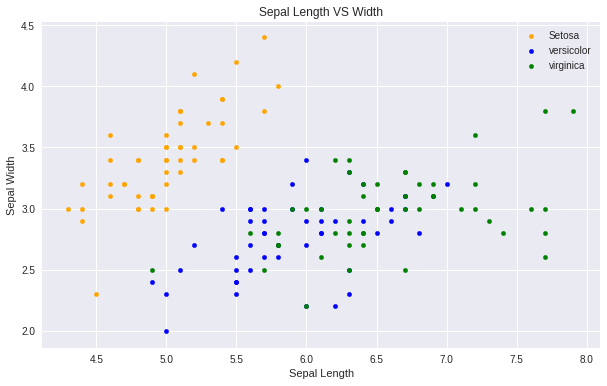

In [53]:
fig = iris[iris.Species=='setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

O gráfico acima mostra a relação entre o comprimento e a largura da sépala. Agora vamos verificar a relação entre o comprimento e a largura da pétala.

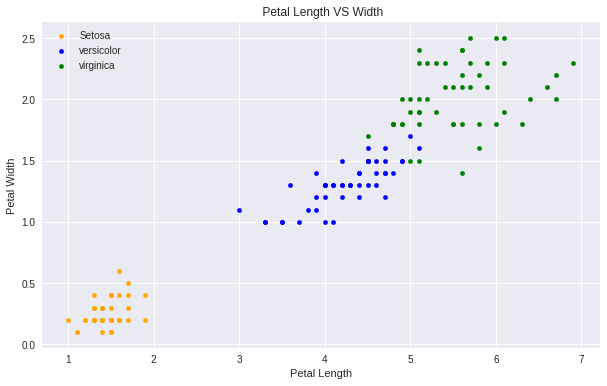

In [54]:
fig = iris[iris.Species=='setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Como podemos ver, as características da Petal estão dando uma melhor divisão de cluster em comparação com as características do Sepal. Esta é uma indicação de que as pétalas podem ajudar em melhores e precisas previsões sobre o Sepal. Vamos verificar isso depois.

### Agora vamos ver como o comprimento e a largura são distribuídos

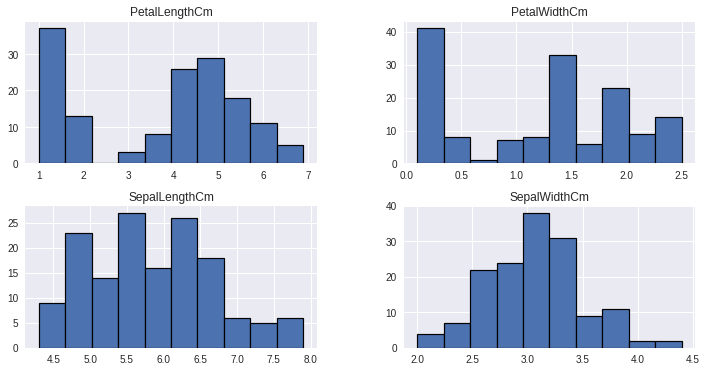

In [55]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Agora, o problema em questão é um problema de classificação. Assim, usaremos os algoritmos de classificação para construir um modelo.
** Classificação** : as amostras pertencem a duas ou mais classes e queremos aprender com dados já rotulados como prever a classe de dados não rotulados

** Regressão ** : se a saída desejada consiste em uma ou mais variáveis contínuas, a tarefa é chamada de regressão. Um exemplo de um problema de regressão seria a previsão do comprimento de um salmão em função de sua idade e peso.

Antes de começarmos, precisamos limpar algumas notações de ML.

** atributos ** -> Um atributo é uma propriedade de uma instância que pode ser usada para determinar sua classificação. No conjunto de dados a seguir, os atributos são o comprimento e a largura da pétala e da sépala. Também é conhecido como ** Recursos **.

** classe **, no contexto de aprendizado de máquina é a variável que é ou deve ser a saída. Aqui as variáveis-alvo são as três espécies de flores.

In [0]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.cross_validation import train_test_split # Para dividir o conjunto de treinamento e teste
from sklearn.neighbors import KNeighborsClassifier  # K nearest neighbours
from sklearn import svm  # Para o algoritmo Support Vector Machine (SVM) Algorithm
from sklearn import metrics # Para verificar as métricas
from sklearn.tree import DecisionTreeClassifier # para o algoritmo de árvores de decisão
from sklearn.neural_network import MLPClassifier # Para as redes neurais

In [60]:
iris.shape #get the shape of the dataset

(150, 5)

Agora, quando treinamos qualquer algoritmo, o número de recursos e sua correlação desempenham um papel importante. Se houver recursos e muitos dos recursos forem altamente correlacionados, o treinamento de um algoritmo com todos os recursos reduzirá a precisão. Assim, a seleção de recursos deve ser feita com cuidado. Este conjunto de dados tem menos recursos, mas ainda veremos a correlação.

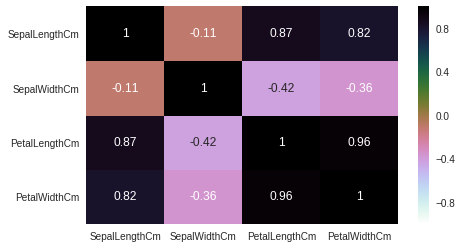

In [59]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

** Observação ---> **

A largura e o comprimento do Sepal não estão correlacionados
A largura e o comprimento da pétala são altamente correlacionados

Usaremos todos os recursos para treinar o algoritmo e verificar a precisão.

Em seguida, usaremos 1 Recurso Pétala e 1 Recurso Sepal para verificar a precisão do algoritmo, pois estamos usando apenas 2 recursos que não estão correlacionados. Assim, podemos ter uma variação no conjunto de dados que pode ajudar na melhor precisão. Nós vamos verificar isso mais tarde.

### Passos a serem seguidos ao aplicar um algoritmo

  1. Divida o conjunto de dados em conjunto de dados de treinamento e teste. O conjunto de dados de teste é geralmente menor do que um treinamento, pois ajudará a treinar melhor o modelo.
  2. Selecione qualquer algoritmo baseado no problema (classificação ou regressão), o que você achar que pode ser bom.
  3. Em seguida, passe o conjunto de dados de treinamento para o algoritmo para treiná-lo. Nós usamos o método **. Fit () **
  4. Em seguida, passe os dados de teste para o algoritmo treinado para prever o resultado. Nós usamos o método **. Predict () **.
  5. Em seguida, verificamos a precisão ** passando o resultado previsto e a saída real ** para o modelo.

### Dividindo os dados no conjunto de dados de treinamento e teste

In [61]:
train, test = train_test_split(iris, test_size = 0.3)# divide o conjunto de dados com 70% para treinamento e 30% para teste
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [0]:
selected_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
train_X = train[selected_columns]# seleciona as colunas que serão utilizadas para treinamento e teste
train_y=train.Species # A classe ou variável alvo
test_X= test[selected_columns] 
test_y =test.Species   # A classe ou variável alvo

Vamos verificar o conjunto de dados de trem e de teste

In [63]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
92,5.8,2.6,4.0,1.2


In [64]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
37,4.9,3.1,1.5,0.1
111,6.4,2.7,5.3,1.9


In [65]:
train_y.head()  ##output of the training data

114     virginica
92     versicolor
23         setosa
41         setosa
143     virginica
Name: Species, dtype: object

### Support Vector Machine (SVM)

In [67]:
model = svm.SVC()
model.fit(train_X,train_y) # nós treinamos o algoritmo com os dados de treinamento e a saída de treinamento
prediction=model.predict(test_X) # agora passamos os dados de teste para o algoritmo treinado

# Para verificar o desempenho, é necessário passar a saída obtida pelo modelo e a esperada
print('A acurácia do SVM é:',metrics.accuracy_score(prediction,test_y)) # agora nós verificamos a acurácia do algoritmo.


A acurácia do SVM é: 0.9555555555555556


SVM está dando uma acurácia muito interessante. Continuaremos a verificar a precisão de diferentes modelos.

Agora, seguiremos os mesmos passos acima para treinar vários algoritmos de aprendizado de máquina.

### Algoritmo de Regressão logistica

In [68]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('A acurácia da regressão logística é:',metrics.accuracy_score(prediction,test_y))

A acurácia da regressão logística é: 0.9777777777777777


### Árvores de decisão

In [69]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('A acurácia das árvores de decisão é:',metrics.accuracy_score(prediction,test_y))

A acurácia das árvores de decisão é: 0.9555555555555556


### K-Nearest Neighbours (KNN)

In [70]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('A acurácia do KNN é:',metrics.accuracy_score(prediction,test_y))

A acurácia do KNN é: 0.9555555555555556


## Redes neurais ##

In [86]:
model=MLPClassifier(
    max_iter = 1000,
    momentum = 0.25,
    learning_rate_init = 0.18,
    hidden_layer_sizes = (12,),
    solver = 'adam',
    learning_rate = 'invscaling',
    activation = 'logistic',
    early_stopping = False,
    shuffle = True,
    batch_size = 10,
    random_state = 2567
)
model.fit(train_X,train_y.map({'setosa':0,'versicolor':1,'virginica':2}))
prediction=model.predict(test_X)
print('A acurácia da rede neural é:',metrics.accuracy_score(prediction,test_y.map({'setosa':0,'versicolor':1,'virginica':2})))

A acurácia da rede neural é: 0.9777777777777777


### Observações:

  - Usar Pétalas sobre Sepal para treinar os dados dá uma precisão muito melhor.
  - Isso era esperado, como vimos no mapa de calor acima, que a correlação entre a Largura Sépala e o Comprimento era muito baixa, enquanto a correlação entre Largura e Comprimento da Pétala era muito alta.

Assim, acabamos de implementar alguns dos Machine Learning comuns. Como o conjunto de dados é pequeno, com poucos recursos, não abordei alguns conceitos, pois eles seriam relevantes quando tivéssemos muitos recursos.

## MÃO NA MASSA ##

Experimente novos atributos e parametros para os algoritmos demonstrados.
Quem conseguirá um melhor resultado?